<a href="https://colab.research.google.com/github/rafaelfabri/Data-Science/blob/master/Gradiente_Impulsionador_para_Previs%C3%A3o_de_Clientes%C2%A0Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Gradiente Impulsionador para Previsão de Clientes Churn**

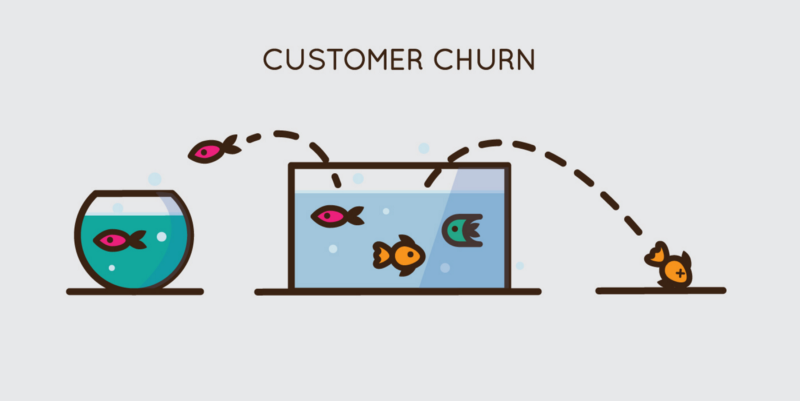



Estamos de volta a nossa análise à um conjunto de dados de uma empresa de telecomunicações, com a finalidade de prever quais futuros consumidores que desistiram de seus planos de assinatura, ou melhor dizendo um cliente Churn.

Nesse segundo capítulo presente no GitHub irei deixar toda análise exploratória feita anteriormente e que jaá foi compartilhada no GitHub, caso já tenha visto, pode ir para o capítulo 3 diretamente como descrito no sumário.

> `Sumário`

>  **1. Importando bibliotecas e Importando dados**

> **2. Análise exploratória**

  * **2.1** Entendendo melhor o conjunto de dados
  * **2.2** Obtendo alguns insights do conjunto de dados
    * **2.2.1** Qual é a quantidade de clientes que cancelaram seus planos e também as que ainda mantém suas assinaturas?!?

    * **2.2.2** Qual é o valor monetário mensal em assinaturas que foi perdido com evasão?!?

    * **2.2.3** Quanto tempo a empresa tem para conquistar a admiração de um novo consumidor e mante-lo como um cliente fiél?!?

    * **2.2.4** A quanto tempo a maioria dos clientes fiéis a empresa tem seus contratos?!?

    * **2.2.5** Qual é a distribuição dos valores mensais de assinatura?!?

    * **2.2.6**  Quem utiliza serviço de proteção tem uma maior probabilidade de não desistir de suas assinaturas?!?

    * **2.2.7** O conjunto de dados tem outliers?!?

> **3. Machine Learning**

  * **3.1** Transformação do Conjunto de Dados
    * **3.1.1** Transformando variáveis categóricas
    * **3.1.2** Separação do conjunto de dados em treino e teste
    * **3.1.3** Balanceamento do conjunto de dados
  * **3.2** Evolução, Treino e avaliação do modelo
    * **3.2.1** Grid Serach
    * **3.2.2** Treino do modelo de Machine Leaning e análise das métricas
    * **3.2.3**  Gráfico ROC
    * **3.2.4** Hipótese da estratégia de negócio da empresa
    * **3.2.5** Teste final com novo limite




Nesse artigo vamos explorar um dataset de uma empresa de telecomunicações. Realizaremos uma análise exploratória para descobrirmos quais as principais características de um futuro cliente Churn.





#Mas o que são Churn?!

 

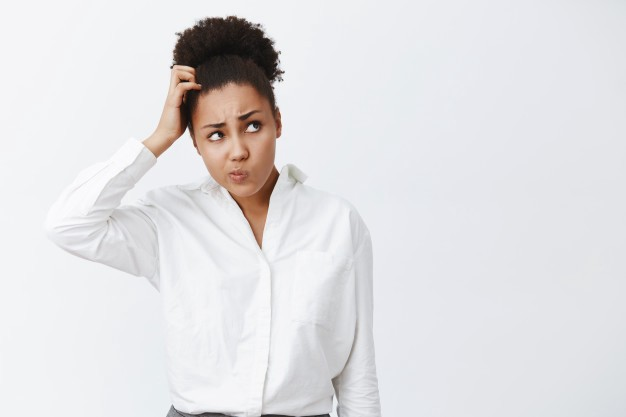

Em si o Churn é o número total de clientes que, em um certo peródo de tempo, não querem mais comprar o produto de determinada empresa, ou que não desejam mais utilizar do serviço prestado da companhia. Essa rotatividade de clientes é constante e natural de qualquer empresa ([Salesforce](https://www.salesforce.com/resources/articles/how-calculate-customer-churn-and-revenue-churn/), [Resultados digitais](https://resultadosdigitais.com.br/blog/o-que-e-churn/)).




Indicador Churn Rate: taxa de rotatividade de clientes

Toda empresa planeja e faz o máximo para ter o menor o Churn Rate possível, assim obtendo uma maior retenção de clientes. Já um Churn Rate alto, indica um alto indice de clientes que não estão mais interessados no serviço e benefícios prestados pela companhia, dessa forma cancelando suas assinaturas([Salesforce](https://www.salesforce.com/resources/articles/how-calculate-customer-churn-and-revenue-churn/)). 

Essas métricas são fundamentais para a sobrevivência de qualquer empreendimento nos dias atuais. De acordo com Philip Kotler, o pai da marketing, conquistar um novo cliente pode custar de 5 à 7 vezes mais do que manter os já existentes ([GONÇALVES .H, 2007](https://lume.ufrgs.br/bitstream/handle/10183/14026/000649603.pdf); [Suno research](https://www.suno.com.br/tudo-sobre/philip-kotler/#:~:text=Philip%20Kotler%20%C3%A9%20um%20estudioso,principalmente%20no%20campo%20do%20marketing.&text=Philip%20Kotler%20ainda%20tem%20boa,de%20%E2%80%9CPai%20do%20Marketing%E2%80%9C.)).

Portanto, se uma empresa quer garantir a permanência de seus consumidores, uma análise exploratória de dados ajudaria muito a identificar futuros clientes que não utilizaram mais seus serviços. Além disso, um modelo eficaz de machine learning poderia trazer resultados ainda melhores.


## **Objetivo**

Dessa forma o objetivo deste artigo, é realizarmos uma análise exploratória do conjunto de dados e um modelo de **machine learning**, disponibilizado pela [IBM](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/), de uma empresa anonima de telecomunicações.

## **1. Importando bibliotecas e Importando dados**

In [ ]:
#importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

In [ ]:
#importando dados
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## **2. Análise exploratória**

A partir deste capítulo será analisado todo conjunto de dados com algumas finalidades, como por exemplo identificar problemas no conjunto de dados em relação a Outliers, dados ausentes e também entendermos melhor o problema que estamos envolvidos, verificar tudo isso através de gráficos e obter possíveis hipóteses. 

### **2.1 Entendendo melhor o conjunto de dados**

In [ ]:
#verificando tamanho do conjunto de dados
print('quantidade de linhas/entradas =', df.shape[0])
print('quantidade de colunas/variáveis =', df.shape[1])

quantidade de linhas/entradas = 7043
quantidade de colunas/variáveis = 21


Abaixo encontra-se as 5 primeiros linhas do dataset, assim conseguimos ter uma melhor visualização dos dados que estamos trabalhando.

In [ ]:
#5 primeiras linhas do conjunto de dados
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


_Em um dataset cada coluna é uma variável do problema estudado._

É importante descrevemos bem o que é cada uma dessas variáveis, pois iremos tirar nossos insigths e hipóteses a partir dos seus resultados, por essa razão abaixo pode-se ver o significado de cada uma das...

**Colunas/variáveis do conjunto de dados**

* **customerID**: ID do cliente(identificação)

* **gender**: sexo da pessoa( Male:homem Female:mulher)

* **SeniorCitizen**: pessoas da terceira idade (idosas>60 anos) normalmente aposentadas *(0 - não ou 1 - sim)*

* **Partner**: pessoas que tem um companheiro ou companheira, que vivem juntos ou são casados

* **Dependents**: se é dependente de alguma pessoa, não tem renda fixa 

* **tenure**: a quanto meses a pessoa assinou o plano

* **PhoneService**: utiliza o plano de telefone *(sim ou não)*

* **MultipleLines**: utiliza o plano de telefone com multiplas linhas ('No phone service', 'No', 'Yes')

* **InternetService**: utiliza o serviço de internet e o tipo ('DSL', 'Fiber optic', 'No')

* **OnlineSecurity**: utiliza o serviço de segurança/antivirus online *(sim ou não)*

* **OnlineBackup**: serviço de backup *(sim ou não)*

* **DeviceProtection**: dispositivo de proteção da rede contra tempestades *(sim ou não)*

* **TechSupport**: assina suporte técnico *(sim ou não)*

* **StreamingTV**: utiliza plano de TV paga *(sim ou não)*

* **StreamingMovies**: utiliza plano de TV paga com foco em filmes *(sim ou não)*

* **Contract**: tempo de contrato *('Month-to-month', 'One year', 'Two year')

* **PaperlessBilling**: recebe boleto online *(sim ou não)*

* **PaymentMethod**: método de pagamento *('Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)')*

* **MonthlyCharges**:  valor do pacote no mês específico (valor monetário)

* **TotalCharges**: valor total pago desde o início até o dia atual do conjunto ou até o fim da assinatura (valor monetário)

* **Churn**: *(sim: cliente cancelou o plano, não: cliente não cancelou)*


Abaixo pode-se observar os tipo de cada variável e vemos que a maioria são do tipo object. Geralmente esse tipo de variável são strings que representam variáveis categóricas.

Na parte de *machine learning* realizaremos a mudança dessas variáveis para um tipo int. Os modelos de *machine learning* apenas aceitam variáveis numéricas, mas ainda representaram as variáveis de forma categórica.

In [ ]:
#tipo de cada variável
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#mudando a variável TotalCharges para tipo float
df['TotalCharges'] = pd.to_numeric(arg = df['TotalCharges'], errors='coerce')

Vamos verificar a quantidade de dados ausentes?!?

Nota-se que apenas a variável _TotalCharges_ tem dados ausentes, sendo 11 entradas.

In [ ]:
#verificando dados ausentes
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

 Mas qual é o motivo que em todo o conjunto de dados com 7.043 linhas, que não apresenta dados ausentes em praticamente nenhuma variável, possuir 11 dados ausentes na variável TotalCharges.

 Vamos verificar essas linhas para ver porque apresenta dados ausentes.

In [ ]:
#3 linhas que apresentam dados ausentes em TotalCharges
df[df['TotalCharges'].isnull()].head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No


Nas 3 linhas observa-se algo curioso, a variável _tenure_ é representada como zero, isso indica que esse cliente ainda não tem nenhum mês de assinatura. Por essa razão o valor de *TotalCharges* é ausente, os clientes ainda não tiveram nenhum pagamento já efetivado.

Os valores corretos em *TotalCharges* para essas linhas são zero. Portando, vão ser feitas essas mudanças.

In [ ]:
#alterando os valores de TotalCharges
df.fillna(value={'TotalCharges':0}, inplace=True)

print("quantidade de dados ausentes em TotalCharges {}".format(df['TotalCharges'].isnull().sum()))

quantidade de dados ausentes em TotalCharges 0


Pronto não há mais nenhum dado ausente.

### **2.2 Obtendo alguns insights do conjunto de dados**

Daqui em diante iremos se aprofundar melhor na nossa avaliação para obter insights importantes para entermos o problema e ver possíveis soluções.

Queremos obter respostas de algumas perguntas importantes:

* **2.2.1** Qual é a quantidade de clientes que cancelaram seus planos e também as que ainda mantém suas assinaturas?!?
  * Quanto financeimente esses clientes representavam para a companhia?

* **2.2.2** Qual é o valor monetário mensal em assinaturas que foi perdido com evasão?!?

* **2.2.3** Quanto tempo a empresa tem para conquistar a admiração de um novo consumidor e mante-lo como um cliente fiél?!?

* **2.2.4** A quanto tempo a maioria dos clientes fiéis a empresa tem seus contratos?!?

* **2.2.5** Qual é a distribuição dos valores mensais de assinatura?!?

* **2.2.6**  Quem utiliza serviço de proteção tem uma maior probabilidade de não desistir de suas assinaturas?!?

* **2.2.7** O conjunto de dados tem outliers?!?


#### **2.2.1 Qual é a quantidade de clientes que cancelaram seus planos e também as que ainda mantém suas assinaturas?!?**

***Essa análise é importante por dois motivos!!!***

Primeiramente, devemos descobrir a quantidade de pessoas que cancelaram seus planos(*churn rate* ou taxa de rotatividade) e também os clientes que mantem seu plano de assinatura.

* 1: A coluna Churn é nossa variável dependente (alvo), portanto é fundamental existir um balanceamento nas duas classes de dados(50% yes, 50% no)


* 2: A partir desse gráfico teremos a primeira ideia de como está a situação da empresa de telecomunicações, se ela tem uma boa retenção de clientes ou uma alta evasão.



> `Para representar essa análise um gráfico barras da coluna Churn cairia muito bem!!!.`


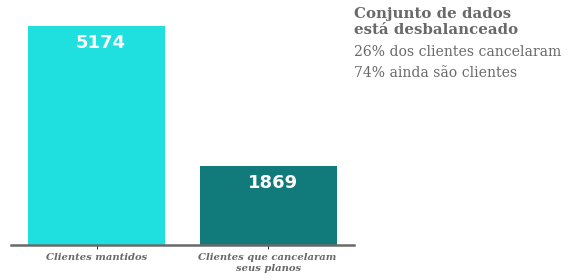

In [ ]:
#definindo fontes
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_weight('bold')
font.set_size(15)

font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_size(14)

font2 = FontProperties()
font2.set_family('serif')
font2.set_name('serif')
font2.set_style('italic')
font2.set_weight('bold')
font2.set_size(10)

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(figsize = (8,4))

#plotando gráfico
sns.countplot(x=df['Churn'], ax=ax, palette = ['#00FFFF', '#008B8B'])

#removendo ticks do eixo y
ax.tick_params(axis = 'y', labelleft=False, width=False)

#removendo label
ax.set_ylabel('')
ax.set_xlabel('')

#mudando ticks x
ax.set_xticklabels(['Clientes mantidos', 'Clientes que cancelaram \nseus planos'], fontproperties = font2, color = '#696969')

#aumentando espessura da linha inferior 
ax.spines['bottom'].set_linewidth(2.5)

#removendo linha direita, esquerda, superior 
for axis in ['top', 'right', 'left']:
  ax.spines[axis].set_color(None)

#mudando a cor da linha do eixo inferior
ax.spines['bottom'].set_color('#696969')

#colocando legenda das quantidades dentro do gráfico
leg_1 = df['Churn'].value_counts().values
for i in range(0,len(leg_1), 1):
  ax.text(x = i-0.12, y = leg_1[i]-500, s = str(leg_1[i]), fontsize = 18, color = '#FFFAFA',  weight='bold')

#criando texto para o gráfico
plt.text(x=1.5,y=5000,s='Conjunto de dados \nestá desbalanceado', fontsize=15, weight='bold', color='#696969', fontproperties=font)
plt.text(x=1.5, y=4500, s = '26% dos clientes cancelaram',fontsize=14, color='#696969', fontproperties = font1)
plt.text(x=1.5, y=4000, s = '74% ainda são clientes ',fontsize=14, color='#696969', fontproperties = font1)

#otimizando tamanho
fig.tight_layout();

Nota-se que a variável Churn está desbalanceada. Um equilibrio entre os dois tipos de informações na coluna Churn é importante, pois quando for elaborado o modelo de machine learning é necessário haver um conjunto com a mesma proporção de resultados na variável alvo. Caso não exista esse balanceamento, o modelo não conseguirá aprender a prever a classe minoritária.

Em relação a situação da empresa de acordo com sua retenção de clientes, o seu desempenho não parece ser tão positivo. Já que 26% dos clientes nos últimos 6 anos cancelaram suas assinaturas, sendo o churn rate = 26%.

> `Como não temos uma informação temporal detalhada não podemos calcular um churn rate anual para comparar com indicadores de empresas conhecidas e famosas.`





> `No entanto, para termos uma melhor visão do impacto desses 1868 clientes, vamos ver quanto eles valiam financeiramente para empresa?!?`



Logo, criaremos um gráfico de barras com o valor total perdido em assinaturas.

A figura abaixo representa os valores mensais em assinaturas ganhos e perdidos ao longo dos 6 anos da empresa.

#### **Qual é o valor monetário mensal em assinaturas que foi perdido com evasão?!?**

In [ ]:
#criando variáveis para o realizamento do gráfico
val = []
eixo_x_graf_2 = ['Total mensal em assinaturas \nperdidas em 6 anos', 'Total mensal conquistado \nno último mês']
val.append(df[df['Churn']=='Yes']['MonthlyCharges'].sum())
val.append(df[df['Churn']=='No']['MonthlyCharges'].sum())

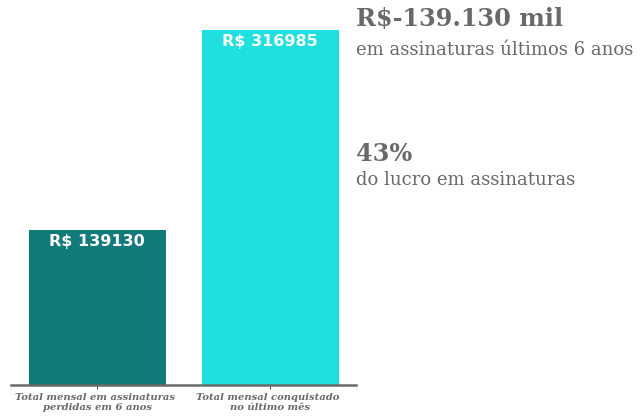

In [ ]:
#definindo fontes
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_weight('bold')
font.set_size(24)

font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_size(18)

font2 = FontProperties()
font2.set_family('serif')
font2.set_name('serif')
font2.set_style('italic')
font2.set_weight('bold')
font2.set_size(10)

#estilo do gráfico
sns.set_style('ticks')

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(figsize=(9,6))

#plotando gráfico
sns.barplot(x=eixo_x_graf_2, y=val, ax=ax, palette = ['#008B8B', '#00FFFF'])

#removendo ticks do eixo y
ax.tick_params(axis='y', labelleft=False, color='white')

#removendo linha direita, esquerda, superior
for axis in ['top', 'right', 'left']:
  ax.spines[axis].set_color(None)

#mudando a cor da linha do eixo inferior
ax.spines['bottom'].set_color('#696969')

#aumentando espessura da linha inferior 
ax.spines['bottom'].set_linewidth(2.5)

#mudando ticks x
ax.set_xticklabels(labels = eixo_x_graf_2, fontproperties=font2, color='#696969')

#colocando legenda das quantidades dentro do gráfico
for i in range(0, len(val), 1):
  ax.text(x = i-0.28, y = int(val[i])-15000, s = 'R$ ' + str(int(val[i])), fontsize = 16, color = '#FFFAFA',  weight='bold')

#criando texto para o gráfico
ax.text(x = 1.5, y = 295000, s = 'R$-139.130 mil \n', fontsize = 24, weight = 'bold', color='#696969', fontproperties=font)
ax.text(x = 1.5, y = 294000, s = 'em assinaturas últimos 6 anos', fontsize = 18, color='#696969', fontproperties=font1)
ax.text(x = 1.5, y = 200000, s = '43%', fontsize = 40, color='#696969', weight = 'bold', fontproperties=font)
ax.text(x = 1.5, y = 160000, s = 'do lucro em assinaturas\n', fontsize = 18, color='#696969', fontproperties=font1)

#otimizando tamanho
fig.tight_layout();

Financeiramente a empresa teve um prejuízo grande em clientes que desistiram de seus planos. Esse valor é 43% do lucro total, olhando para esse aspecto percentual é um valor significativamente consideravel para empresa.

Além de não estar considerando todo o valor perdido que foi investido marketing, vendas, TI etc para conquistar esse cliente que depois de um período de tempo cancelou seu plano.

Através destes dois gráficos fica óbvio o grande prejuízo que a falta de uma melhor política de retenção de clientes está causando nessa organização.



Além disso, algo muito importante para checarmos é:

#### **2.2.2 Quanto tempo a empresa tem para conquistar a admiração de um novo consumidor e mante-lo como um cliente fiél?!?**

In [ ]:
#criando variáveis para o realizamento do gráfico
val_1 = []
leg_1 = []
val_2 = []
for i in range(1,73,1):
  val_1.append( df[(df['Churn']=='Yes') & (df['tenure']==i)]['MonthlyCharges'].sum() )
  val_2.append( df[(df['Churn']=='No') & (df['tenure']==i)]['MonthlyCharges'].sum() )
  leg_1.append(i)

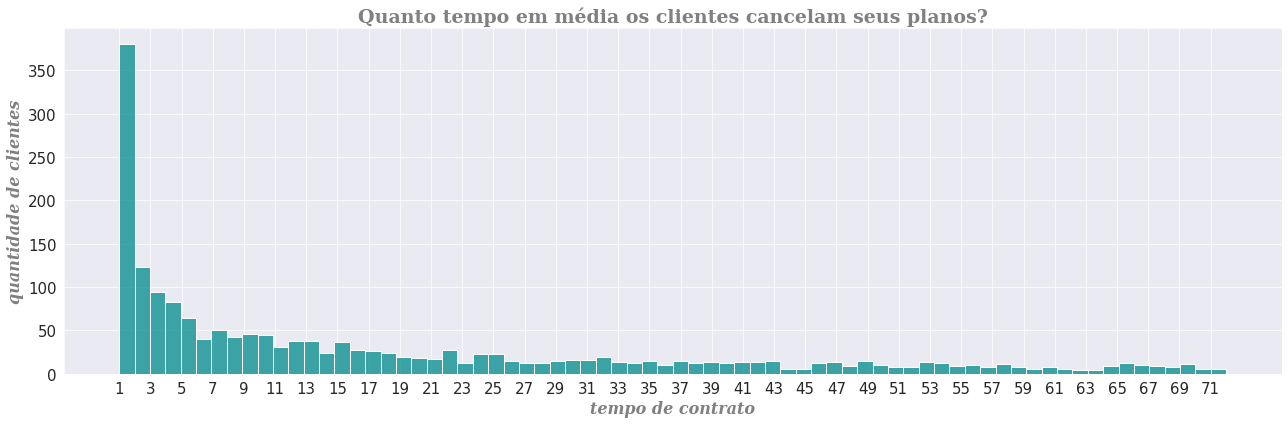

In [ ]:
#definindo fontes
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_weight('bold')
font.set_size('19')

font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_style('italic')
font1.set_weight('bold')
font1.set_size(16)

#estilo do gráfico
sns.set_style('darkgrid')

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(figsize=(18,6))

#plotando gráfico
sns.histplot(x=df[df['Churn'] == 'Yes']['tenure'], ax=ax, bins=72, color='#008B8B')

#atribuindo um título ao gráfico
ax.set_title('Quanto tempo em média os clientes cancelam seus planos?', fontproperties = font, color='#808080')

#mudando ticks x 
ax.set_xticklabels(labels=np.arange(1,72,2), fontdict={'fontsize':15})
ax.set_xticks(np.arange(1,72,2))

#mudando ticks y
ax.set_yticklabels(labels=np.arange(0,400,50), fontdict={'fontsize':15})
ax.set_yticks(np.arange(0,400,50))

#mudando nome do eixo x e y
ax.set_xlabel('tempo de contrato', fontproperties=font1, color='#808080')
ax.set_ylabel('quantidade de clientes', fontproperties=font1, color='#808080')

#removendo linha direita, esquerda, superior
for axis in ['top', 'right', 'bottom', 'left']:
  ax.spines[axis].set_color(None)

#otimizando tamanho
fig.tight_layout();

O histograma acima mostra o tempo que um cliente Churn, leva para cancelar seu plano. Podemos observar que a maioria desisti de sua assinatura após o primeiro mês, além disso até 5 meses há uma desistência de mais de 50 clientes. Também podemos notar que a desistência dos clientes pode ocorrer em qualquer período de uso, pois o histograma vai até o mês 72 (6 anos). 

> `Esse resultado mostra o grande desafio que está empresa de telecomunicações tem pela frente. A companhia tem poucos meses até identificar um cliente Churn e aplicar alguma metodologia e benefícios para reter esse consumidor.`

Porém, é evidente que investir dinheiro para manter esse novo usuário é muito menos custoso do que perde-lo e investir na busca de um novo. Ou melhor, porque não garatir esse cliente e posteriormente investir o lucro deste na conquista de um novo cliente ao mesmo tempo.

Vamos dar uma olhada em coisas boas também!!!

#### **2.2.3 A quanto tempo a maioria dos clientes fiéis a empresa tem seus contratos?!?**

Realizaremos um gráfico de distribuição comparando clientes fiés a empresa e cliente que cancelaram suas assinaturas.

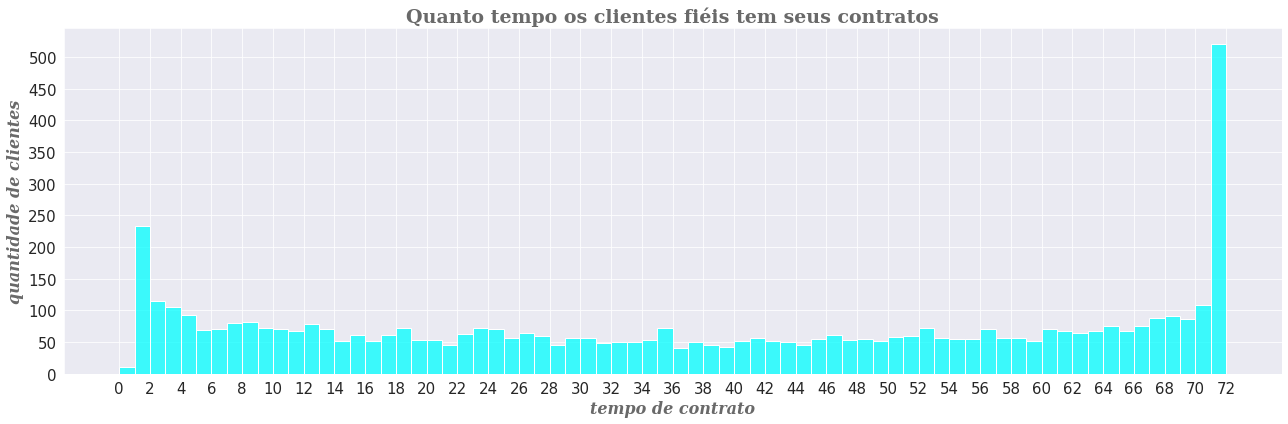

In [ ]:
#definindo fontes
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_weight('bold')
font.set_size('19')

font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_style('italic')
font1.set_weight('bold')
font1.set_size(16)

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(figsize=(18,6))

#plotando gráfico
sns.histplot(x=df[df['Churn'] == 'No']['tenure'], ax=ax, bins=72, color='#00FFFF')

#atribuindo um título ao gráfico
ax.set_title('Quanto tempo os clientes fiéis tem seus contratos', fontproperties = font, color='#696969')

#mudando ticks x 
ax.set_xticklabels(labels=np.arange(0,73,2), fontdict={'fontsize':15})
ax.set_xticks(np.arange(0,73,2))

#mudando ticks y
ax.set_yticklabels(labels=np.arange(0,550,50), fontdict={'fontsize':15})
ax.set_yticks(np.arange(0,550,50))

#mudando nome do eixo x e y
ax.set_xlabel('tempo de contrato', fontproperties=font1, color='#696969')
ax.set_ylabel('quantidade de clientes', fontproperties=font1, color='#696969')

#otimizando tamanho
fig.tight_layout();

Nota-se algo muito interessante nesse histograma. Olhe 500 clientes já estão com seus a planos a 6 anos(72 meses). Isso mostra que existe clientes muito leais a companhia. Também observa-se que nos últimos 4 meses teve uma crescente ascenção de clientes novos.

#### **2.2.4 Qual é a distribuição dos valores mensais de assinatura?!?** 

Realizaremos um gráfico de distribuição comparando clientes fiés a empresa e cliente que cancelaram suas assinaturas.

In [ ]:
#criando função para fazer ticks
def escala(minimo, maximo, intervalo):
  x = []
  for i in range(minimo, maximo, intervalo):
    x.append(i)
  return x

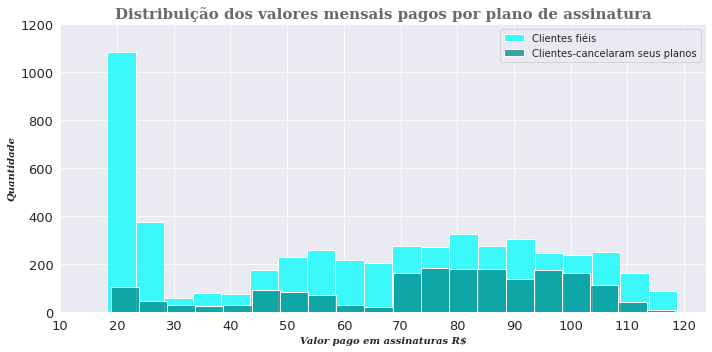

In [ ]:
#definindo fontes
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_weight('bold')
font.set_size(15)

font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_style('italic')
font1.set_weight('bold')
font1.set_size(10)

#definindo estilo
sns.set_style('darkgrid')

#criando figure, axes e definindo tamanho do gráfico
fig, ax = plt.subplots(figsize=(10,5))

#plotando gráfico
sns.histplot(df[df['Churn']=='No']['MonthlyCharges'], ax=ax, kde = False, color = '#00FFFF', bins = 20)
sns.histplot(df[df['Churn']=='Yes']['MonthlyCharges'], ax=ax, kde = False, color = '#008B8B', bins = 20)

#atribuindo um título ao gráfico
ax.set_title('Distribuição dos valores mensais pagos por plano de assinatura', fontproperties = font, color = '#696969')

#mudando nome do eixo x e y
ax.set_xlabel('Valor pago em assinaturas R$', fontproperties = font1)
ax.set_ylabel('Quantidade', fontproperties = font1)

#atribuindo legenda
ax.legend(['Clientes fiéis','Clientes-cancelaram seus planos'])

#mudando ticks x
ax.set_xticklabels(labels = np.arange(10,140,10),fontdict={'fontsize':13})
ax.set_xticks(np.arange(10,130,10))

#mudando ticks y
ax.set_yticklabels(labels = np.arange(0,1400,200),fontdict={'fontsize':13})
ax.set_yticks(np.arange(0,1400,200))

#otimizando tamanho
fig.tight_layout();

Observa-se uma tendência semelhante dos dois tipos de clientes. Porém, em uma escala de menor quantidade para os clientes que desistiram da empresa.

* Churn: a maior frequência de assinaturas dos planos são de valores de R$ 70 até 100.

* clientes fiéis: Aproximadamente 1100 clientes assinam um pacote do valor entre RS 20 e 25. Além disso percebe-se uma alta frequência nos valores de RS 50 até 110.

Algo curioso para testarmos com esses dados, é se o cliente que utiliza de algum pacote de proteção como DeviceProtection, OnlineSecurity, OnlineBackup, TechSupport possuem uma menor chance de cancelarem seus planos.
Para responder essa pergunta, realizaremos 8 gráficos de barras.
Os 4 primeiros gráficos abaixo, são referentes aos clientes que não utilizam destes serviços.

#### **2.2.5  Quem utiliza serviço de proteção tem uma maior probabilidade de não desistir de suas assinaturas?!?**

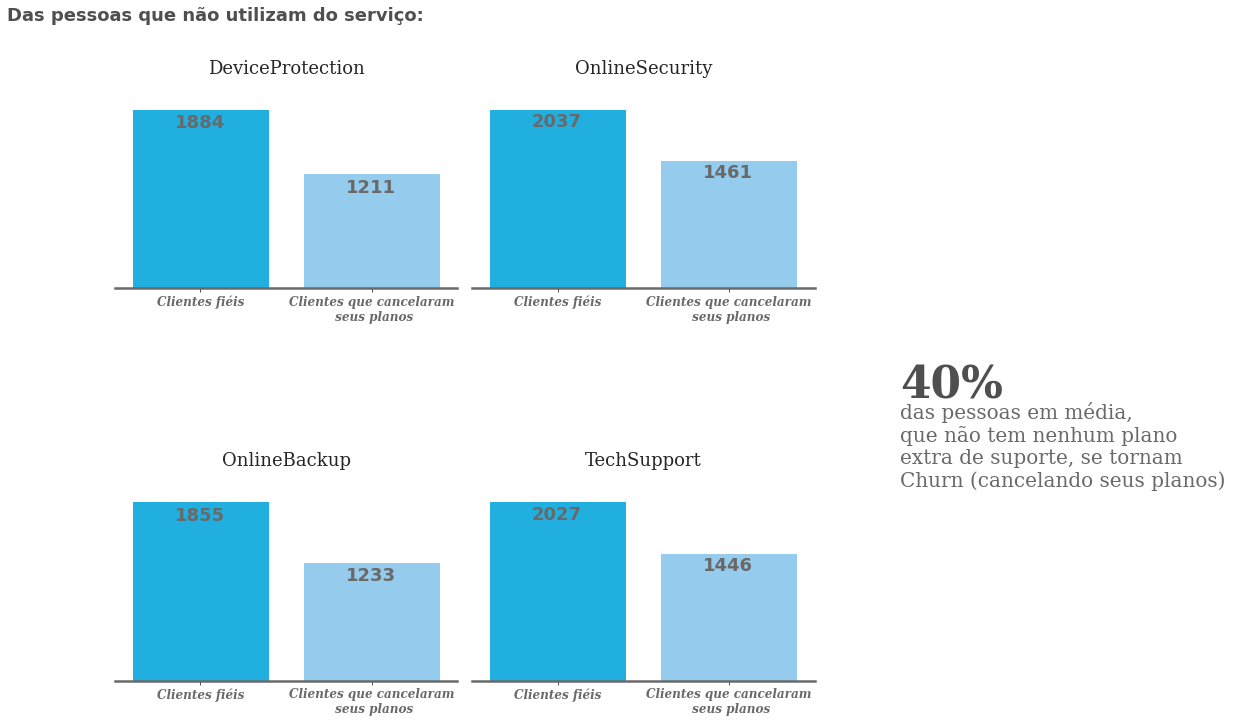

In [ ]:
#definindo fontes

font4 = FontProperties()
font4.set_family('serif')
font4.set_name('serif')
font4.set_style('italic')
font4.set_weight('bold')
font4.set_size(12)

#font7 = FontProperties()
#font7.set_family('serif')
#font7.set_name('serif')
#font7.set_weight('bold')
#font7.set_size(44)


font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_size(20)

font2 = FontProperties()
font2.set_family('serif')
font2.set_name('serif')
font2.set_size(18)

font3 = FontProperties()
font3.set_family('serif')
font3.set_name('serif')
font3.set_weight('bold')
font3.set_size(44)


sns.set_style('ticks')

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16,10))


#plotando gráfico
sns.countplot(x=df[df['DeviceProtection']=='No']['Churn'], ax=ax[0][0], palette = ['#00BFFF', '#87CEFA'])
sns.countplot(x=df[df['OnlineSecurity']=='No']['Churn'], ax=ax[0][1], palette = ['#00BFFF', '#87CEFA'])
sns.countplot(x=df[df['OnlineBackup']=='No']['Churn'], ax=ax[1][0], palette = ['#00BFFF', '#87CEFA'])
sns.countplot(x=df[df['TechSupport']=='No']['Churn'], ax=ax[1][1], palette = ['#00BFFF', '#87CEFA'])

plt.suptitle("Das pessoas que não utilizam do serviço:", x=0.1, y=1, fontsize=18, weight='bold', color='#4F4F4F')

#removendo linha direita, esquerda, superior 
for axis in ['top', 'left', 'right']:
  for i in range(0,2,1):
    for j in range(0,2,1):
       ax[i][j].spines[axis].set_color(None)

#aumentando espessura da linha inferior 
for i in range(0,2,1):
  for j in range(0,2,1):
    ax[i][j].spines['bottom'].set_linewidth(2.5)
    
    ax[i][j].spines['bottom'].set_color('#696969')

    #removendo ticks do eixo y
    ax[i][j].tick_params(axis = 'y', labelleft = False, width=False)

    #removendo label
    ax[i][j].set_ylabel('')
    ax[i][j].set_xlabel('')

    ax[i][j].set_xticklabels(['Clientes fiéis','Clientes que cancelaram\n seus planos'], fontproperties=font4, color = '#696969')


#colocando legenda das quantidades dentro do gráfico
l=-1
leg_2 = ['DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'TechSupport']
for i in range(0,2,1):
  for j in range(0,2,1):
    l=l+1
    for k in range(0,2,1):
      ax[i][j].text(x = k-0.15, y = df[df[str(leg_2[l])]=='No']['Churn'].value_counts().values[k]-200,  
                    s = str(df[df[str(leg_2[l])]=='No']['Churn'].value_counts().values[k]), size=18, weight='bold', color='#696969') 


#criando texto para o gráfico 
plt.text(x=2,y=2200, s='das pessoas em média, \nque não tem nenhum plano \nextra de suporte, se tornam\nChurn (cancelando seus planos)',
         color='#696969', fontproperties=font1)
plt.text(x=2,y=3200, s='40%', fontsize=30, weight='bold', color='#4F4F4F',  fontproperties=font3)

#
ax[0][0].set_title("\n\nDeviceProtection\n", fontproperties=font2)
ax[0][1].set_title("OnlineSecurity\n",fontproperties=font2)
ax[1][0].set_title("OnlineBackup\n", fontproperties=font2)
ax[1][1].set_title("TechSupport\n", fontproperties=font2)


#otimizando tamanho
fig.tight_layout();

Assim fazendo uma média do percentual dos clientes que cancelaram seus planos chegamos ao valor de 40%.

Os 4 próximos gráficos são em relação aos clientes que utilizam algum serviço de segurança.

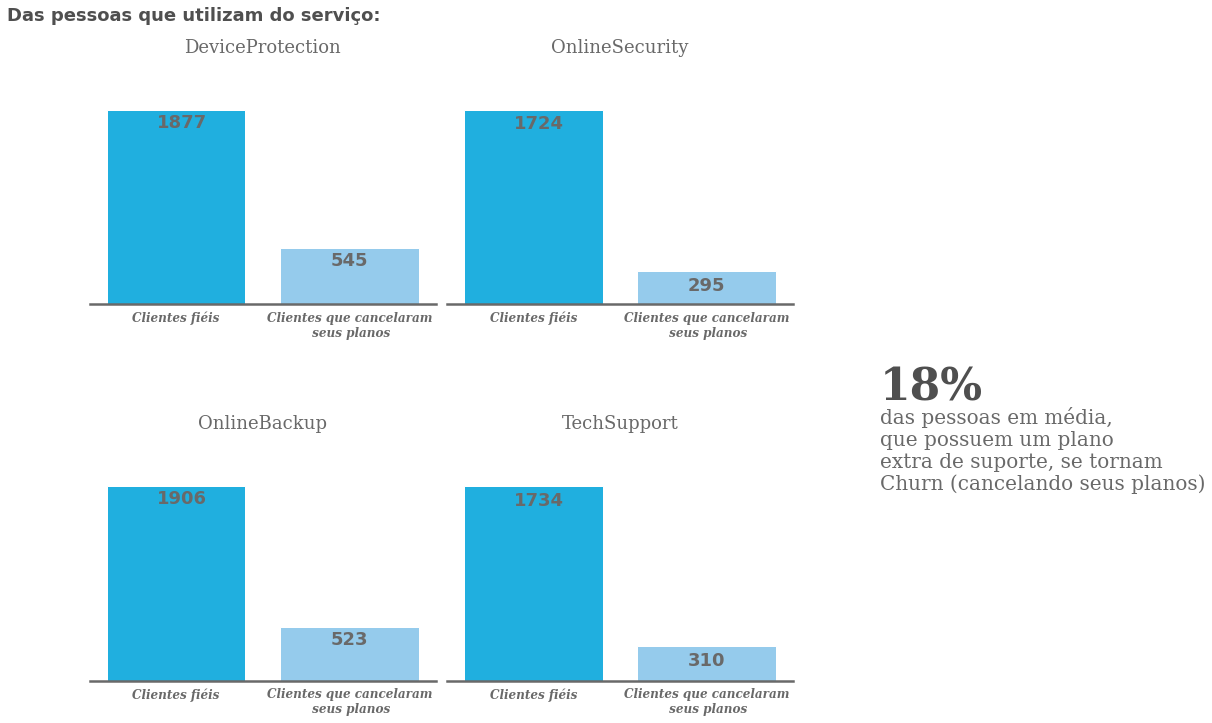

In [ ]:
#definindo fontes

font4 = FontProperties()
font4.set_family('serif')
font4.set_name('serif')
font4.set_style('italic')
font4.set_weight('bold')
font4.set_size(12)

font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_size(20)

font2 = FontProperties()
font2.set_family('serif')
font2.set_name('serif')
font2.set_size(18)

font3 = FontProperties()
font3.set_family('serif')
font3.set_name('serif')
font3.set_weight('bold')
font3.set_size(44)


#criando estilo
sns.set_style("white")

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16,10))

#plotando gráfico
sns.countplot(x=df[df['DeviceProtection']=='Yes']['Churn'], ax=ax[0][0], palette = ['#00BFFF', '#87CEFA'])
sns.countplot(x=df[df['OnlineSecurity']=='Yes']['Churn'], ax=ax[0][1], palette = ['#00BFFF', '#87CEFA'])
sns.countplot(x=df[df['OnlineBackup']=='Yes']['Churn'], ax=ax[1][0], palette = ['#00BFFF', '#87CEFA'])
sns.countplot(x=df[df['TechSupport']=='Yes']['Churn'], ax=ax[1][1], palette = ['#00BFFF', '#87CEFA'])

#criando texto para o gráfico
plt.suptitle("Das pessoas que utilizam do serviço:\n\n", x=0.1, y=1, fontsize=18, weight='bold', color='#4F4F4F')


#título do gráfico
ax[0][0].set_title("\nDeviceProtection\n\n", fontdict = {'fontsize':14},fontproperties=font2,color = '#696969')
ax[0][1].set_title("OnlineSecurity\n\n", fontdict = {'fontsize':14}, fontproperties=font2,color = '#696969')
ax[1][0].set_title("OnlineBackup\n\n", fontdict = {'fontsize':14}, fontproperties=font2,color = '#696969')
ax[1][1].set_title("TechSupport\n\n", fontdict = {'fontsize':14}, fontproperties=font2,color = '#696969')

#removendo linha direita, esquerda, superior 
for axis in ['top', 'left', 'right']:
  for i in range(0,2,1):
    for j in range(0,2,1):
       ax[i][j].spines[axis].set_color(None)

#aumentando espessura da linha inferior 
for i in range(0,2,1):
  for j in range(0,2,1):
    ax[i][j].spines['bottom'].set_linewidth(2.5)
    
    #removendo ticks do eixo y
    ax[i][j].tick_params(axis = 'y', labelleft = False, width=False)

    ax[i][j].spines['bottom'].set_color('#696969')

    #removendo label
    ax[i][j].set_ylabel('')
    ax[i][j].set_xlabel('')

    ax[i][j].set_xticklabels(['Clientes fiéis','Clientes que cancelaram\n seus planos'], fontproperties=font4, color = '#696969')

#colocando legenda das quantidades dentro do gráfico
l=-1
leg_2 = ['DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'TechSupport']
for i in range(0,2,1):
  for j in range(0,2,1):
    l=l+1
    for k in range(0,2,1):
      ax[i][j].text(x = k-0.11, y = df[df[str(leg_2[l])]=='Yes']['Churn'].value_counts().values[k]-170,  
                    s = str(df[df[str(leg_2[l])]=='Yes']['Churn'].value_counts().values[k]), size=18, weight='bold', color='#696969') 

#criando texto para o gráfico
plt.text(x = 2, y=1700, s='das pessoas em média, \nque possuem um plano \nextra de suporte, se tornam\nChurn (cancelando seus planos)',
         color='#696969', fontproperties=font1)
plt.text(x = 2,y=2500, s='18%',color='#4F4F4F',  fontproperties=font3)


#otimizando tamanho
fig.tight_layout();

Agora a média percentual abaixa para 18%.



> `Através destes dois conjunto de gráfico, podemos afirmar que se um consumidor utiliza um dos serviços de proteção ele tem uma menor probabilidade se tornar Churn, sendo essa diferença de 22%.`



#### **2.2.6 O conjunto de dados tem outliers?!?**

Que tal fazermos um boxplot das variáveis contínuas. Assim podemos ver a existência de Outliers.

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


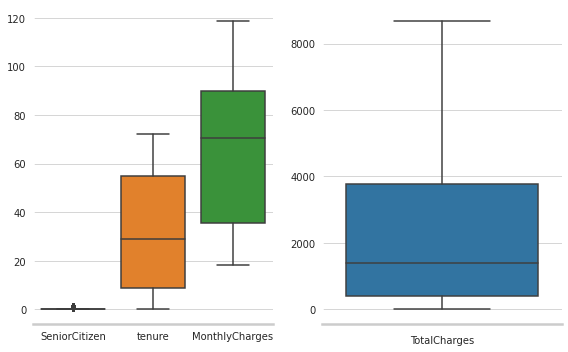

In [ ]:

sns.set_style('whitegrid')

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(ncols = 2, figsize=(8,5))

#plotando gráfico
sns.boxplot(data=df.drop('TotalCharges', axis=1), ax = ax[0])
sns.boxplot(y = df['TotalCharges'], data=df, ax = ax[1])

#removendo linha direita, esquerda, superior 
for i in range(0,2):
  for j in ['right', 'top', 'left']:
    ax[i].spines[j].set_color(None)

#aumentando espessura da linha inferior 
for i in range(0,2):
  for j in ['left', 'bottom']:
    ax[i].spines[j].set_linewidth(2.5)

#legendas
ax[1].set_ylabel('')
ax[1].set_xlabel('TotalCharges')

#otimizando tamanho
fig.tight_layout();

#### **2.2.7 Algumas outras caracteriśticas dos clientes Churn**

Vamos fazer duas verificações:

1. Será o tipo de internet contratada tem alguma relação com o cliente ser Churn ou não?
2. Será que a forma de pagamento tem alguma influência em cliente cancelar sua assinatura?

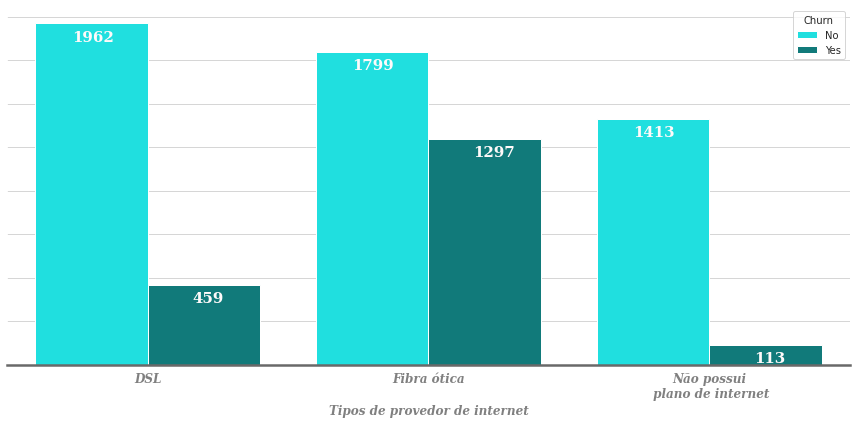

In [ ]:
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_size(15)
font.set_weight('bold')

font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_size(12)
font1.set_weight('bold')
font1.set_style('italic')

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(figsize=(12,6))

#plotando gráfico
sns.countplot(x=df['InternetService'], hue=df['Churn'], ax=ax, palette=['#00FFFF', '#008B8B'])

#removendo linha direita, esquerda, superior
for axis in ['left', 'right', 'top']:
  ax.spines[axis].set_color(None)

#removendo ticks do eixo y
ax.tick_params(axis = 'y', left = None, labelleft = None)

#mudando a cor da linha do eixo inferior
ax.spines['bottom'].set_color('#696969')

#aumentando espessura da linha inferior 
ax.spines['bottom'].set_linewidth(2.5)

#mudando nome do eixo x e y
ax.set_ylabel('')
ax.set_xlabel('Tipos de provedor de internet', fontproperties = font1, color = '#808080')

#mudando ticks x 
ax.set_xticklabels(['DSL', 'Fibra ótica', 'Não possui\n plano de internet'], fontproperties = font1, color = '#808080')

#colocando legenda das quantidades dentro do gráfico
j = -0.25
for i in range(0, len( df.groupby('InternetService')['Churn'].value_counts().values ), 1):
  if (i%2 != 0):
    ax.text(x = j - 0.09, y = df.groupby('InternetService')['Churn'].value_counts().values[i] -100,
           s = str( df.groupby('InternetService')['Churn'].value_counts().values[i] ), 
           fontproperties = font, color='#FFFAFA')
    j = j + 0.5

  else:
    ax.text(x = j - 0.02, y = df.groupby('InternetService')['Churn'].value_counts().values[i] - 100,
            s = str( df.groupby('InternetService')['Churn'].value_counts().values[i] ),
            fontproperties = font, color='#FFFAFA')
    j = j + 0.5

#otimizando tamanho
fig.tight_layout()

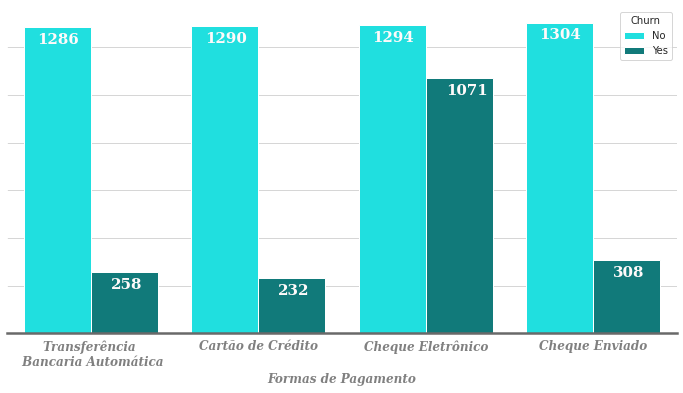

In [ ]:
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_size(15)
font.set_weight('bold')

font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_size(12)
font1.set_weight('bold')
font1.set_style('italic')

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(figsize=(12,6))

#plotando gráfico
sns.countplot(x = df['PaymentMethod'].sort_values(), hue = df['Churn'],  palette = ['#00FFFF', '#008B8B'])

#removendo linha direita, esquerda, superior
for axis in ['left', 'right', 'top']:
  ax.spines[axis].set_color(None)

#mudando a cor da linha do eixo inferior
ax.spines['bottom'].set_color('#696969')

#aumentando espessura da linha inferior 
ax.spines['bottom'].set_linewidth(2.5)

#mudando nome do eixo x e y
ax.set_ylabel('')
ax.set_xlabel('Formas de Pagamento', fontproperties = font1, color = '#808080')

#mudando ticks x 
ax.set_xticklabels(['Transferência \n Bancaria Automática', 'Cartão de Crédito', 'Cheque Eletrônico' ,'Cheque Enviado'], 
                   fontproperties = font1, color = '#808080')

#colocando legenda das quantidades dentro do gráfico
j = -0.25
for i in range(0, len( df.groupby('PaymentMethod')['Churn'].value_counts().values ), 1):
  if (i%2 != 0):
    ax.text(x = j-0.13, y = df.groupby('PaymentMethod')['Churn'].value_counts().values[i] -70,
            s = str( df.groupby('PaymentMethod')['Churn'].value_counts().values[i] ), 
            fontproperties = font, color = '#FFFAFA')
    j = j + 0.5

  else:
    ax.text(x = j-0.07, y = df.groupby('PaymentMethod')['Churn'].value_counts().values[i] - 70,
            s = str( df.groupby('PaymentMethod')['Churn'].value_counts().values[i] ),
            fontproperties = font, color = '#FFFAFA')
    j = j + 0.5


ax.tick_params(axis = 'y', left = None, labelleft = None)

Através deste dois gráficos, pode-se responder as perguntas acima.

1. Nota-se que clientes que assinam internet do tipo fibra ótica, tem um maior número de cancelamentos em comparação com os clientes que não possuem internet ou que assinam internet do tipo DSL.

Podemos levantar algumas hipóteses do motivo disso acontecer:
* serviço de internet por fibra ótica não deve ter um bom desempenho
* custo benefício da internet fibra ótica pode ser ruim fazendo clientes se decepcionarem com a empresa de telecomunicação

2. Já no segundo gráfico é possível afirmar que os clientes que utilizam da forma de pagamento por Cheque eletrônico acabam cancelando seus planos mais do que outras formas.

## **3. Machine Learning**

Chegamos a parte mais legal do nosso projeto. Agora iremos realizar nosso modelo de *machine learning*.

Vamos criar um algoritmo de machine learning para classificação de clientes, que identificará consumidores que estão desapontados com o serviço da prestado pela empresa de telecomunicações e que provavelmente cancelaram suas assinaturas.

Para a criar o modelo preditivo utilizaremos a biblioteca XGBoost, que é um algoritmo baseado no Gradient Boosting. A XGBoost é um pouco semelhante a um algoritmo de floresta aleatória (como se fosse várias árvores de decisões), porém com algumas diferenças importantes [(Pathak. M, 2019)](https://www.datacamp.com/community/tutorials/xgboost-in-python)   [(XGBoost)](https://xgboost.readthedocs.io/en/latest/tutorials/model.html).

Já para a preparação dos dados (transformação), validação cruzada, Grid Search etc utilizaremos a biblioteca Scikit Learn.

### **3.1 Transformação do Conjunto de Dados**

A etapa de transformação é fundamental para não ocorrer nenhum erro no momento do treino do modelo e também para alcançar os melhores resultados possíveis na predição. 
Vamos importar as bibliotecas necessárias para o projeto.

In [ ]:
#instalando 
!pip install -q scikit-plot

In [ ]:
#importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import scikitplot as skplt

#importando métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, plot_roc_curve, auc, log_loss

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### **3.1.1 Transformando variáveis categóricas**

Primeiramente, sabemos que o código de aprendizado de máquina não aceita variáveis categóricas do tipo texto (string). Por exemplo:

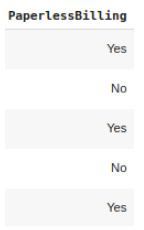

Portanto, temos que converter *PaperlessBilling* e as outras colunas para números inteiros(int), exemplo (Yes = 1, No = 0).

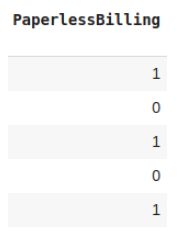

Para isso vamos utilizar a função *LabelEnconding*() da biblioteca Scikit Learn.

In [ ]:
#Apagando coluna customerID
df_copy.drop(labels=['customerID'], axis = 1, inplace = True)

#Criando listas com colunas que vão para LabelEnconder
columns_label_enc = []

for i in range(0, len(df_copy.dtypes), 1):
  if (df_copy.dtypes[i] == 'object'):
    columns_label_enc.append(df_copy.dtypes.keys()[i])

#instanciândo LabelEnconder 
label = LabelEncoder()

#condição de repetição
for i in columns_label_enc:

  #Tranformando dados colunas categóricas (yes, no) em LabelEnconding (0,1)
  df_copy[i] = label.fit_transform(df_copy[i])


Pronto agora a transformação das variáveis categóricas foram feitas.

In [ ]:
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#### **3.1.2 Separação do conjunto de dados em treino e teste!!!**

Neste momento iremos realizar a separação do conjunto de dados em treino e teste.

Os dados de treino são utilizados para que o algoritimo de machine learning saíba distinguir as duas classes (positiva e negativa), através do treino o modelo irá aprender a prever as duas classes, assim no cojunto de teste poderemos aplicar o modelo para que seja realizada a previsão.

Após o teste podemos comparar os resultados previstos com os resultados reais para obtenção de algumas métricas para análise.

In [ ]:
#separando o conjunto em X e y
X, y = df_copy.drop(labels = ['Churn'], axis = 1), df_copy['Churn']

#separando o conjunto em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

Também, vamos separar o conjunto teste em dois tipos.

* test_val: Conjunto para validação e melhoria do modelo depois da primeira previsão de dados.
* test_final: Conjunto de teste final depois do modelo já otimizado e com os melhores parâmetros.

In [ ]:
#separando dados -> val: validação de dados / final: última verificação dos resultados
X_test_val, X_test_final, y_test_val, y_test_final = train_test_split(X_test, y_test, test_size = 0.3, random_state=123, stratify=y_test)

In [ ]:
#verificando tamanho do conjunto de dados
print('Dimensão no conjunto de dados X_train')
print('quantidade de linhas/entradas =', X_train.shape[0])
print('quantidade de colunas/variáveis =', X_train.shape[1])


Dimensão no conjunto de dados X_train
quantidade de linhas/entradas = 4930
quantidade de colunas/variáveis = 19


In [ ]:
#verificando tamanho do conjunto de dados
print('Dimensão no conjunto de dados X_test_val')
print('quantidade de linhas/entradas =', X_test_val.shape[0])
print('quantidade de colunas/variáveis =', X_test_val.shape[1])

Dimensão no conjunto de dados X_test_val
quantidade de linhas/entradas = 1479
quantidade de colunas/variáveis = 19


In [ ]:
#verificando tamanho do conjunto de dados
print('Dimensão no conjunto de dados X_test_final')
print('quantidade de linhas/entradas =', X_test_final.shape[0])
print('quantidade de colunas/variáveis =', X_test_final.shape[1])

Dimensão no conjunto de dados X_test_final
quantidade de linhas/entradas = 634
quantidade de colunas/variáveis = 19


#### **3.1.3 Balanceamento do conjunto de dados**

Existe um desbalanceamento em nossa variável alvo, pois 26% dos clientes são Churn e 74% dos Clientes não são Churn. 

Isso pode acarretar que o modelo faça  uma boa previsão da classe marjoritária (clientes não Churn) e não prever tão bem a classe minoritária (clientes Churn). A pouca quantidade de clientes Churn pode fazer com que o algoritimo não consiga aprender a prever essa classe por causa de sua menor quantidade se comparado com a classe não Churn.

Realizaremos uma validação cruzada, para vermos o resultado do nosso modelo desbalanceado e balanceado. Abaixo está o código.

In [ ]:
#Instanciando modelo XGBoost para realizar o Cross Validation
model_xg = xgb.XGBClassifier(random_state=123)

#Realizando cross validation
accur_val = cross_val_score(model_xg, X_train, y_train, scoring='accuracy', cv = 5)
recall_val = cross_val_score(model_xg, X_train, y_train, scoring='recall', cv = 5)

print('\tRESULTADOS DAS MÉTRICAS DE DESEMPENHO DO MODELO SEM O BALANCEAMENTO')
print('\t\t\tAcurácia média = ', round(accur_val.mean(),3), "+/-" , round(accur_val.std(),3))
print('\t\t\tRecall médio = ', round(recall_val.mean(),3), "+/-" , round(recall_val.std(),3))

	RESULTADOS DAS MÉTRICAS DE DESEMPENHO DO MODELO SEM O BALANCEAMENTO
			Acurácia média =  0.804 +/- 0.009
			Recall médio =  0.53 +/- 0.032


Para balancear o conjunto de dados utilizaremos a biblioteca imblearn. Realizaremos o balanceamento no conjunto minoritário, criando novas entradas utilizando o OverSampling. Assim o conjunto terá mais clientes Churn.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

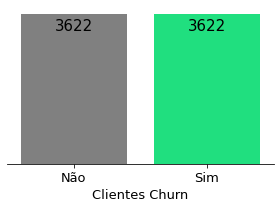

In [ ]:
#Importando bibliotecas
from imblearn.over_sampling import RandomOverSampler

#Instanciandp Random Over Sampler
ros = RandomOverSampler()

#Realizando o fit no conjunto de dados - Balanceamento
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)

#Transformando y_train_ros em uma série do Pandas
y_train_ros = pd.Series(y_train_ros)

#criando figure
fig, ax = plt.subplots(figsize=(4,3))

#plotando gráfico de barras
sns.countplot(y_train_ros, palette = ['#808080', '#00FF7F']);

#Mudando nomes dos ticks
ax.set_xticklabels(labels = ['Não', 'Sim'], fontdict = {'fontsize':13})

#Mudando nome do eixo
ax.set_ylabel('')
ax.set_xlabel('Clientes Churn', fontdict={'fontsize':13})

#Retirando os ticks do eixo
ax.tick_params(labelleft = None, left = None)

#Apagando linhas do eixo
for axis in ['left', 'right','top']:
  ax.spines[axis].set_color(None)

#Atribuíndo legendas da quantidade de valores em cada barra
for i in range(0, len(df['Churn'].value_counts().values), 1):
  ax.text(x = i - 0.14, y = y_train_ros.value_counts().values[i] - 400, s = str(y_train_ros.value_counts().values[i]),
          size = 15)

#otimizando gráfico
fig.tight_layout();

In [ ]:
#Instanciando modelo XGBoost para realizar o Cross Validation
model_xg_bal = xgb.XGBClassifier()

#Realizando cross validation
accur_val_bal = cross_val_score(model_xg_bal, X_train_ros, y_train_ros, scoring = 'accuracy')
recall_val_bal = cross_val_score(model_xg_bal, X_train_ros, y_train_ros, scoring = 'recall')


print('\t\tRESULTADOS DAS MÉTRICAS DE DESEMPENHO DO MODELO BALANCEADO')
print('\t\t\t50% Clientes Churn - 50% Clientes fiéis\n')
print('\t\t\tAcurácia média = ', round(accur_val_bal.mean(),3), "+/-" , round(accur_val_bal.std(),3))
print('\t\t\tRecall médio = ', round(recall_val_bal.mean(),3), "+/-" , round(recall_val_bal.std(),3))

		RESULTADOS DAS MÉTRICAS DE DESEMPENHO DO MODELO BALANCEADO
			50% Clientes Churn - 50% Clientes fiéis

			Acurácia média =  0.78 +/- 0.003
			Recall médio =  0.836 +/- 0.012


Chegou o momento de discutirmos os dois resultados. 

Observa-se que o valor da acurácia (percentual total de acertos na classificação) para os dois modelos, balanceado e não balanceado, é bem semelhante. No entanto, nota-se que houve uma diferença grande no resultado do Recall [(Agarwal. R)](https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226).


A métrica Recall apenas verifica os dados positivos, onde o cliente é Churn. O recall significa, de todos os valores positivos (1), quantos o modelo previu corretamente como sendo positivo.

Pode-se notar que no modelo desbalanceado, que temos menos clientes Churn, o modelo teve um percentual de acertos de 53,0%.


> Um valor muito baixo,tendo a mesma chance de resultado do que uma advinhação aleatória de 50%.

No entanto, olhando o resultado Recall do modelo balanceado, onde os dados são 50% clientes Churn (1) e 50% clientes não Churn(0), houve uma melhora muito significativa no treino do modelo, o percentual de acerto foi para 83,6%.

Essa comparação evidência a importancia do conjunto de dados estar balanceado para a realização do treino.

**obs**: o balanceamento foi apenas realizado no conjunto treino, o conjunto teste não será alterado. Assim quando realizarmos o teste do modelo o resultado será o mais real possível.


### **3.2 Evolução, Treino e avaliação do modelo**

#### **3.2.1 Grid Serach**

Chegou a hora de treinarmos nosso modelo. Através da função Grid Search vamos encontrar os melhores parâmetros para previsão de novos dados.
Os parâmetros que vamos verificar são:

* Learning rate: Taxa de aprendizado do modelo;
* n_estimators: Número de árvores que será construídas;
* max_depth: Profunidadade da árvore.

Para isso foi utilizado o código abaixo:

In [ ]:
#importando Grid Search CV
from sklearn.model_selection import GridSearchCV

In [ ]:
#Instanciandp modelo XGBoost para realizar o Grid Search
xg_best_params = xgb.XGBClassifier()

#Definindo parâmetros para GridSearch
params = {'eta' : [0.0001, 0.001, 0.01, 0.1],
          'max_depth' : [5,7,9,10],
          'n_estimators': [150,200,250,350,400,450],
           "clf__tree_method": ["gpu_hist"]
          }

#Instanciando o GridSearch com os parâmetros 
grid = GridSearchCV(xg_best_params, params, scoring='recall')

#Realizando o fit para encontrar os melhores parâmetros
grid.fit(X_train_ros, y_train_ros)

print('melhor score', grid.best_score_)
print('melhor parametro', grid.best_params_)

melhor score 0.9693370165745856
melhor parametro {'clf__tree_method': 'gpu_hist', 'eta': 0.0001, 'max_depth': 10, 'n_estimators': 450}


Abaixo encontra-se a cross validation com os melhores parâmetros encontrados.

In [ ]:
#Instanciando modelo XGBoost para realizar o Cross Validation
xg_best_params = xgb.XGBClassifier(n_estimators = 450, max_depth = 10, learning_rate = 0.0001, seed=123)

#Realizando cross validation com os melhores parâmetros definidos
accur_val_best = cross_val_score(xg_best_params, X_train_ros, y_train_ros, scoring = 'accuracy')
recall_val_best = cross_val_score(xg_best_params, X_train_ros, y_train_ros, scoring = 'recall')

print('\t\tRESULTADOS DAS MÉTRICAS DE DESEMPENHO DO MODELO OTIMIZADO')
print('\t\t\tAcurácia média = ', round(accur_val_best.mean(),3), "+/-" , round(accur_val_best.std(),3))
print('\t\t\tRecall médio = ', round(recall_val_best.mean(),3), "+/-" , round(recall_val_best.std(),3))

		RESULTADOS DAS MÉTRICAS DE DESEMPENHO DO MODELO OTIMIZADO
			Acurácia média =  0.803 +/- 0.008
			Recall médio =  0.854 +/- 0.029


Agora que encontramos os melhores parâmetros para modelo pela função Grid Search, podemos realizar o treino do modelo e seu teste.

Vale ressaltar que o resultado do GridSearch provavelmente não será o resultado real na hora de prevermos os valores do conjunto teste.

#### **3.2.2 Treino do modelo de Machine Leaning e análise das métricas**

Abaixo está o código com o treinamento do algoritmo de machine learning.

In [ ]:
#instanciando o modelo
xg_best_params = xgb.XGBClassifier(n_estimators = 450, max_depth = 10, learning_rate = 0.0001, random_state=123)

#treino do modelo -> realizando o fit do modelo -> o ajuste do modelo em relação aos dados de treinamento 
xg_best_params.fit(X_train_ros, y_train_ros)

#previsão do conjunto de dados de teste de validação
y_pred_val = xg_best_params.predict(np.asarray(X_test_val))
y_pred_proba = xg_best_params.predict_proba(np.asarray(X_test_val))


In [ ]:
#print das principais métricas do modelo
print(classification_report(y_test_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1086
           1       0.48      0.65      0.55       393

    accuracy                           0.72      1479
   macro avg       0.67      0.70      0.68      1479
weighted avg       0.76      0.72      0.73      1479



Agora para avaliarmos nosso resultado utilizaremos uma matriz de confusão. 

A matriz de confusão tem a ideia de mostrar as previsões corretas e erradas do modelo de machine learning.

Utilizando a variável y_pred_val que é a previsão e comparando com y_test_val que é nosso verdadeiro valor, que foi separado anteriormente, iremos construir a matriz. A matriz tem 4 partes:

* Verdadeiro Negativo: Quando o valor real é negativo e o modelo preve como sendo negativo, previsão correta "Verdadeiro";

* Falso Positivo: Quando o valor real é negativo, porém o modelo preve como positivo, previsão errada "Falsa";

* Falso Negativo: Quando o valor real é positivo, mas o modelo preve como negativo, previsão errada "Falsa";

* Verdadeiro Positivo: Quando o valor real é positivo e o modelo preve como sendo positivo, previsão correta "Verdadeiro".

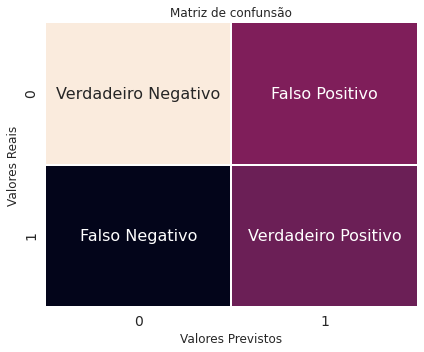

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))

labels = [['Verdadeiro Negativo', 'Falso Positivo'], 
          ['Falso Negativo', 'Verdadeiro Positivo']]
labels = np.asarray(labels)

sns.heatmap(confusion_matrix(y_test_val, y_pred_val), annot=labels, fmt='', cbar=False,
            annot_kws={'size':16}, linewidths=1)

ax.set_title('Matriz de confunsão')

ax.set_xticklabels(['0','1'], fontsize=14)
ax.set_yticklabels(['0', '1'], fontsize=14)

ax.set_ylabel('Valores Reais', fontsize=12)
ax.set_xlabel('Valores Previstos', fontsize=12)

fig.tight_layout();

A partir disso temos uma ideia básica do que é uma matriz de confusão, assim abaixo está o código para criação da mesma.

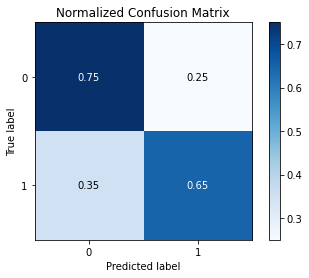

In [ ]:
#matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test_val, y_pred_val, normalize=True);

Para conhecimento, o valor de 0,65 é o Recall. Logo, a partir do conjunto teste, hipotéticamente separando uma amostra que possui somente a classe positiva, o modelo previu corretamente 65%, isso somente considerando os clientes Churn.

Já o valor de 0,75 é chamado de especialidade, significando que hipotéticamente separando uma amostra com apenas a classe negativos, o modelo previu corretamente 75%, levando em conta somente os cliente não Churn. 

Não temos um um resultado tão bom, mas para nosso primeiro modelo criado está ótimo.

> `Claramente podemos tentar melhorar esses valores, talvez com um tratamento diferente de tranformações de dados, criando novas variáveis, utilizando outro algoritmo de machine learning, etc. No entanto, que tal utilizarmos a curva ROC para alterarmos os limites e vermos se os resultados mudam.`


#### **3.2.3  Gráfico ROC**

A teoria da curva ROC é muito interessante e importante, mas não irei explicar ela toda, pois leveria todo um artigo para demonstra-lá. Porém, acessem esse [link](https://www.teses.usp.br/teses/disponiveis/55/55134/tde-04032009-114050/publico/tese.pdf), nele está uma ótima tese que li para entender a teoria básica por traz da curva ROC.

Sendo breve, a curva ROC tem em seu eixo x a TFP (Taxa de Falsos Positivos ou 1-Especialidade) e no eixo y aTVP (Taxa de Verdadeiros Positivos ou Recall).

Nossa matriz anterior foi realizada a partir de um limiar de 50%, o que é isso:

Significa que se a probabilidade de um cliente ser Churn, for maior do que 50% o resultado previsto será positivo (1) e se menor do que 50% será negativo (0).

Porém, podemos alterar esse limiar para um valor diferente de 50%. Na verdade a curva ROC são vários pontos plotados com os valores de TFP e TVP com diferentes limiares que resultam em diferentes matrizes de confusão e resultados [(Matsubara. E)](https://www.teses.usp.br/teses/disponiveis/55/55134/tde-04032009-114050/publico/tese.pdf).

Abaixo encontra-se o código para realização do gráfico ROC.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


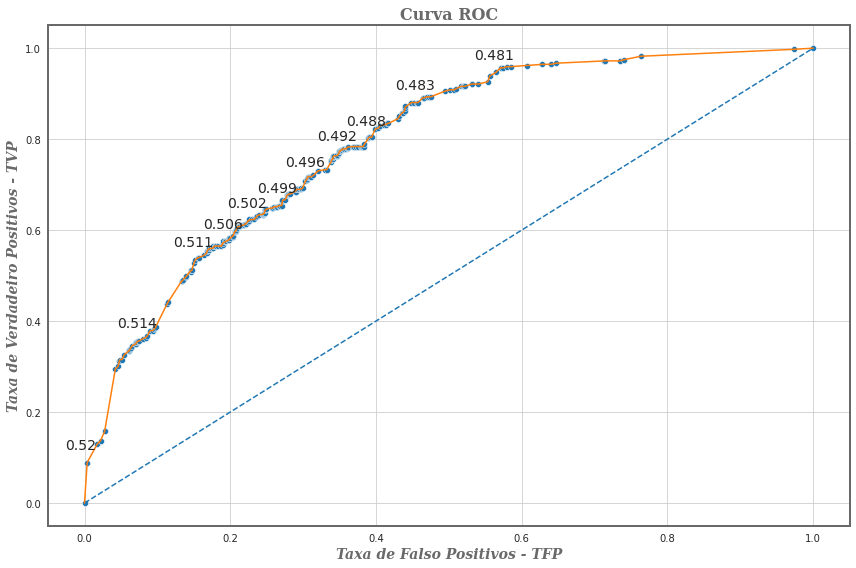

In [ ]:
#fontes
font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_style('italic')
font1.set_weight('bold')
font1.set_size(14)

font2 = FontProperties()
font2.set_family('serif')
font2.set_name('serif')
font2.set_weight('bold')
font2.set_size(16)

#transformar y_pred_proba_val em uma dimensão apenas
predict = y_pred_proba[:,1]
#tranformar y_test_ros_val e uma array com uma dimensão
test = np.asarray(y_test_val)

#copilar valores 
fpr, tpr, thresholds = roc_curve(test, predict)

#Estilo do gráfico
sns.set_style('whitegrid')

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(figsize=(12,8))

#plotando gráfico
sns.lineplot([0,1],[0,1], linestyle='--');
sns.scatterplot(fpr, tpr, ax=ax);
sns.lineplot(fpr, tpr, ax=ax);

ax.set_title('Curva ROC', fontproperties=font2, color = '#696969')

#mudando nome do eixo x e y
ax.set_ylabel('Taxa de Verdadeiro Positivos - TVP', color = '#696969', fontproperties=font1)
ax.set_xlabel('Taxa de Falso Positivos - TFP', color = '#696969', fontproperties=font1)

#aumentando espessuras das linhas  
for axis in ['top', 'bottom', 'right', 'left']:
  ax.spines[axis].set_linewidth(2)

#mudando a cor da linha do eixo
for axis in ['top', 'bottom', 'right', 'left']:
  ax.spines[axis].set_color('#696969')

#colocando legenda das quantidades dentro do gráfico
for i in range(1, len(thresholds), 20):
  ax.text(x = fpr[i]-0.03, y = tpr[i]+0.03, s = str(round(thresholds[i],3)), size=14)

#otimizando gráfico
fig.tight_layout();

Olhando o gráfico, nota-se que a curva ROC obtida não é tão boa, pois invés da curva crescer de forma mais paralela ao eixo y, na verdade ela começa inclinar cada vez mais para o eixo x.

Contudo podemos modificar nossos resultados e a matriz de confusão a partir do gráfico ROC de uma maneira que os ganhos de uma companhia de telocomunicação sejam maiores.

#### **3.2.4 Hipótese da estratégia de negócio da empresa**



> `Pensando em nosso problema, o que desejamos?`



Queremos prever quais são os clientes Churn, não é? Então precisamos melhorar nossa Taxa de Verdadeiro Positivo. No entanto, olhando no gráfico não podemos melhorar nosso verdadeiro positivo sem piorar o falso positivo.

Com uma análise macro da situação, não seria tão ruim prever um falso positivo, pois na pior das situações daríamos um mês gratuíto de um serviço da empresa ou algum outro benefício para conquistar aquele cliente que na verdade está satisfeito com a empresa. Já perder um cliente que não foi previsto corretamente como Churn seria uma situaçao ruim.

Claro, acima foi levantada apenas uma hipótese, cada empresa e companhia terá uma situação financeira, ganhos, objetivos entre outros aspectos estratégicos que podem nortear decisões importantes do modelo de machine learning.

Então que tal modificar os limites de probabilidade para obter uma taxa 0.80 de verdadeiros positivos. Olhando no gráfico acima para obtermos esse Recall é necessário seguir em linha reta do eixo y do valor de 0.80 e ver qual é o ponto em que intersecta a curva ROC.

A partir disso encontramos que esse ponto é aproximadamente 0.492 e verificando qual é valor x (TFP) para esse limite percebemos que é aproximadamente 0.38.

Assim com o código abaixo podemos verificar com melhor exatidão qual é esse limiar de probabilidade.

In [ ]:
for i in range(0, len(fpr), 1):
  if((tpr[i]>0.79) & (fpr[i]<0.39)):
    print(thresholds[i])

0.48765573


O valor que retorna do código é 0.48765573.

Esse resultado é o limite de probabilidade que utilizaremos na nova predição. Resumindo esse limite de probabilidade significa que se a probabilidade de um cliente ser da classe positiva (Cliente Churn) for maior que 0.48765573 este é considerado como da classe positiva.

> `P(x≥0.48765573) = 1`

> `P(x<0.48765573) = 0`

Agora vamos realizar novamente a previsão do conjunto de dados teste, porém agora utilizaremos o test_final. Como o código é muito semelhante aos anteriores não irei coloca-lo abaixo, apenas o resultado da matriz de confusão.



#### **3.2.5 Teste final com novo limite**

Agora vamos realizar novamente a previsão do conjunto de dados teste, porém agora utilizaremos o **test_final**. Como o código é muito semelhante aos anteriores não irei coloca-lo abaixo, apenas o resultado da matriz de confusão.

In [ ]:
#previsão do conjunto de dados de teste de final
y_pred_proba_final = xg_best_params.predict_proba(np.asarray(X_test_final))

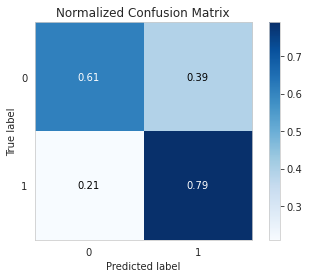

In [ ]:
#Atribuindo o novo limite para y_pred_proba_final
y_pred_final = []
for i in range(0, len(y_pred_proba_final), 1):
  if y_pred_proba_final[i][1] > 0.48765573:
    y_pred_final.append(1)
  else:
    y_pred_final.append(0)

#plotando nova matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test_final, y_pred_final, normalize=True);

Uau, conseguimos um melhor resultado para previsão dos clientes que são Churn. Nosso modelo de machine learning consegue acertar uma taxa de 79% os clientes Churn e 68% os clientes não Churn.

Infelizmente estamos chegando ao fim do nosso artigo, mas antes de termimarmos podemos concluir algumas coisas.

## **Conclusão**

Podemos concluir que o resultado do nosso algoritmo de machine learning está aceitável dentro de nossas hipóteses.

Claro, que pode ser melhorado e modificado caso em alguma análise mais apurada não tragá tão ganhos a uma companhia.
Contudo, podemos entender algumas coisas bem interessantes com a construção deste modelo de machine learning, como por exemplo:
* Pré processamento de dados;
* Validação Cruzada;
* Grid Search;
* Treino e teste do modelo;
* Matrizes de confusão;
* Gráfico ROC.

Dessa forma, ficaremos por aqui nesse artigo.